In [1]:
import json
import csv
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  # Agregamos esta línea para importar PCA

In [2]:
#COMPLETO***

import os
import json
import pandas as pd

# Función para procesar un archivo de registro y agregarlo al DataFrame
def procesar_log(archivo):
    with open(archivo, 'r') as file:
        lines = file.readlines()
    data = []
    for line in lines:
        data.append(json.loads(line))
    return pd.json_normalize(data)

# Ruta de la carpeta que contiene las muestras
carpeta_raiz = r"C:\Users\Janus\Desktop\ia\ubiqlog+smartphone+lifelogging\muestras"

# Crear una lista para almacenar todos los DataFrames
dfs = []

# Recorrer la carpeta raíz
for persona in os.listdir(carpeta_raiz):
    persona_dir = os.path.join(carpeta_raiz, persona)
    # Verificar si es un directorio
    if os.path.isdir(persona_dir):
        # Recorrer los archivos de registro en el directorio de la persona
        for log_file in os.listdir(persona_dir):
            if log_file.endswith('.txt'):
                log_path = os.path.join(persona_dir, log_file)
                # Procesar el archivo de registro y agregarlo al DataFrame
                try:
                    # Procesar el archivo de registro y agregarlo al DataFrame
                    df = procesar_log(log_path)
                    # Agregar una columna para identificar la persona
                    df['Persona'] = persona
                    dfs.append(df)
                except Exception as e:
                    print("persona "+persona+" ** "+log_file) #     -> significa que en este archivo hay un error (probablemente tipo json)

# Concatenar todos los DataFrames en uno solo
df_final = pd.concat(dfs, ignore_index=True)

# Guardar el DataFrame final en un archivo CSV
df_final.to_csv(r"C:\Users\Janus\Desktop\ia\resultados1.csv", index=False)
#C:\Users\jpalv\OneDrive\Escritorio\PARCIAL_02_IA_2024\resultados.csv
#C:\Users\Jean Paul\Desktop\PARCIAL 2 IA JEANPI


persona 12_M ** log_12-5-2013.txt
persona 13_F ** log_11-23-2013.txt
persona 13_F ** log_11-30-2013.txt
persona 13_F ** log_12-1-2013.txt
persona 13_F ** log_12-20-2013.txt
persona 14_F ** log_12-24-2013.txt
persona 16_F ** log_12-1-2013.txt
persona 16_F ** log_12-12-2013.txt
persona 18_F ** log_12-9-2013.txt
persona 1_M ** log_11-1-2014.txt
persona 1_M ** log_11-5-2014.txt
persona 21_F ** log_1-10-2014.txt
persona 21_F ** log_1-4-2014.txt
persona 21_F ** log_1-6-2014.txt
persona 21_F ** log_1-7-2014.txt
persona 21_F ** log_1-8-2014.txt
persona 21_F ** log_11-10-2013.txt
persona 21_F ** log_11-11-2013.txt
persona 21_F ** log_11-12-2013.txt
persona 21_F ** log_11-13-2013.txt
persona 21_F ** log_11-15-2013.txt
persona 21_F ** log_11-16-2013.txt
persona 21_F ** log_11-17-2013.txt
persona 21_F ** log_11-19-2013.txt
persona 21_F ** log_11-20-2013.txt
persona 21_F ** log_11-21-2013.txt
persona 21_F ** log_11-25-2013.txt
persona 21_F ** log_11-26-2013.txt
persona 21_F ** log_11-27-2013.txt
pe

In [3]:
df_final.describe().T

count  unique  \
Application.ProcessName   762400    1488   
Application.Start         762400  285966   
Application.End           762400  294770   
Call.Number                94092    1794   
Call.Duration              94092     748   
Call.Time                  94092   18028   
Call.Type                  94092       7   
Persona                  8758407      35   
SMS.Address                27284    1509   
SMS.type                   27284       2   
SMS.date                   27284   25317   
SMS.body                   27284      27   
SMS.Type                   27284       2   
SMS.metadata.name          23791     800   
WiFi.SSID                7128486   35787   
WiFi.BSSID               7128486   58041   
WiFi.capabilities        7128486     182   
WiFi.level               7128486     108   
WiFi.frequency           7128486      39   
WiFi.time                7128486  744518   
Location.Latitude         631450  109667   
Location.Longtitude       631450  107199   
Location.Altitude         631450    7565   
Location.time             631450  593056   
Location.Accuracy         631450   88693   
Location.Provider         631450       3   
Bluetooth.name             99848     485   
Bluetooth.address          99848     960   
Bluetooth.bond status      99848       3   
Bluetooth.time             99848    1866   
Picture.FullPath             267     267   
Picture.Time                 267     267   
Location.Speed            318568     703   
Activity.start             14580    9530   
Activity.end               14580    9528   
Activity.type              14580       6   
Activity.condfidence       14580      74   
Call.metadata.name           393      16   

                                                                       top  \
Application.ProcessName                                    com.android.nfc   
Application.Start                                      12-16-2013 10:19:47   
Application.End                                         12-3-2013 13:29:36   
Call.Number                                                  +98936252####   
Call.Duration                                                            0   
Call.Time                                               1-14-2014 22:09:26   
Call.Type                                                                2   
Persona                                                                1_M   
SMS.Address                                                  +98930770####   
SMS.type                                                                 1   
SMS.date                                               11-12-2013 10:15:37   
SMS.body                                                        ANONYMIZED   
SMS.Type                                                                 1   
SMS.metadata.name                                                            
WiFi.SSID                                                          eduroam   
WiFi.BSSID                                               f4:ec:38:f4:6b:78   
WiFi.capabilities                                [WPA2-PSK-CCMP][WPS][ESS]   
WiFi.level                                                             -89   
WiFi.frequency                                                        2462   
WiFi.time                Monday, June 1, 2015 11:39:27 AM Pacific Dayli...   
Location.Latitude                                               35.7019285   
Location.Longtitude                                             51.3532491   
Location.Altitude                                                      0.0   
Location.time                                          12-19-2013 17:48:20   
Location.Accuracy                                                     30.0   
Location.Provider                                                    fused   
Bluetooth.name                                                    HAJAR-PC   
Bluetooth.address                                        9C:B7:0D:48:8D:BF   
Bluetooth.bond status                           

Se escogieron como caracteristicas despues de hacer el analisis exploratorio a las siguientes: Aplicacion. Name , la columna de cuando empieza y cuando terima se paso a datetime y se calculo el tiempo de uso a partir de esta y se escogio esa variabl, a si mismo tambien se encontro el dia de la semana despues de operar con la fecha. Esas tres variables dle dan sentido a la relacion entre el uso de las aplicaciones, su duracion y la frecuencia de uso de cada dia de la semana. 

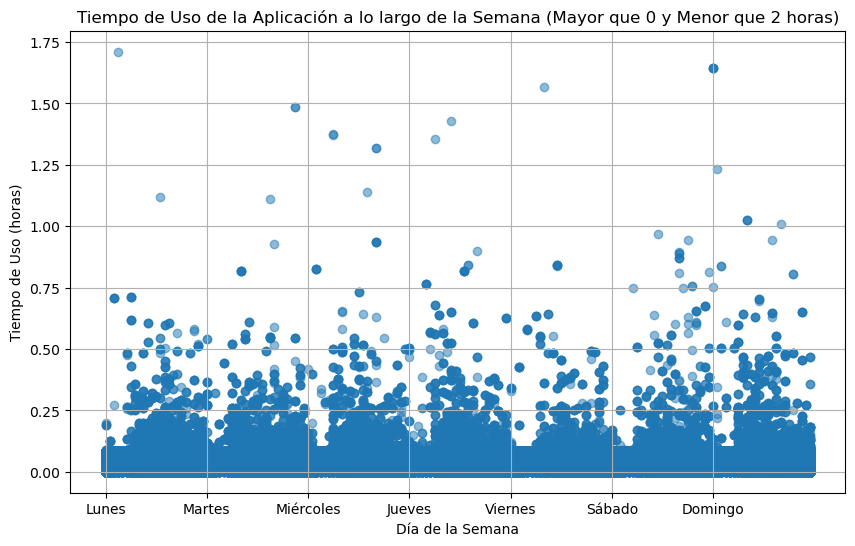

In [5]:

df_final['Application.Start'] = pd.to_datetime(df_final['Application.Start'], errors='coerce')
df_final['Application.End'] = pd.to_datetime(df_final['Application.End'], errors='coerce')

# Eliminamos las filas que contienen valores NaT
df_final = df_final.dropna(subset=['Application.Start', 'Application.End'])

# Calculamos la duración de uso de la aplicación en horas
df_final['Tiempo de Uso (horas)'] = (df_final['Application.End'] - df_final['Application.Start']).dt.total_seconds() / 3600

# Filtramos los registros donde el tiempo de uso es mayor que 0 horas y menor que 2 horas
df_final = df_final[(df_final['Tiempo de Uso (horas)'] > 0) & (df_final['Tiempo de Uso (horas)'] < 2)]

# Extraemos el día de la semana de la columna Application.Start
df_final['Día de la Semana'] = df_final['Application.Start'].dt.dayofweek + df_final['Application.Start'].dt.hour / 24

# gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_final['Día de la Semana'], df_final['Tiempo de Uso (horas)'], alpha=0.5)
plt.title('Tiempo de Uso de la Aplicación a lo largo de la Semana (Mayor que 0 y Menor que 2 horas)')
plt.xlabel('Día de la Semana')
plt.ylabel('Tiempo de Uso (horas)')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid(True)
plt.show()

El grafico muestra como es la relación entre el tiempo de uso de las aplicaciones y el dia de la semana, de ese modo no se ve una clara distinción de cuando empieza un día y termina otro, la mayoría de aplicaciones se usan en promedio dentro de un rango de 45 minutos, los días que concentran mayor densidad de puntos por área del grafico son los fines de semana y el lunes.      En general la mayoría de aplicaciones se usan durante menos de 15 minutos, una minoría notable se usa por mas de una hora y media y el dia que mas se usa una aplicación en específico es el día lunes.

In [7]:
unique_values = df_final['Application.ProcessName'].unique()
value_to_int = {value: index for index, value in enumerate(unique_values)}



In [8]:
df_final['aplicacion'] = df_final['Application.ProcessName'].map(value_to_int)


In [9]:
df_final['Hora'] = df_final['Application.Start'].dt.hour

C:\Users\Janus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


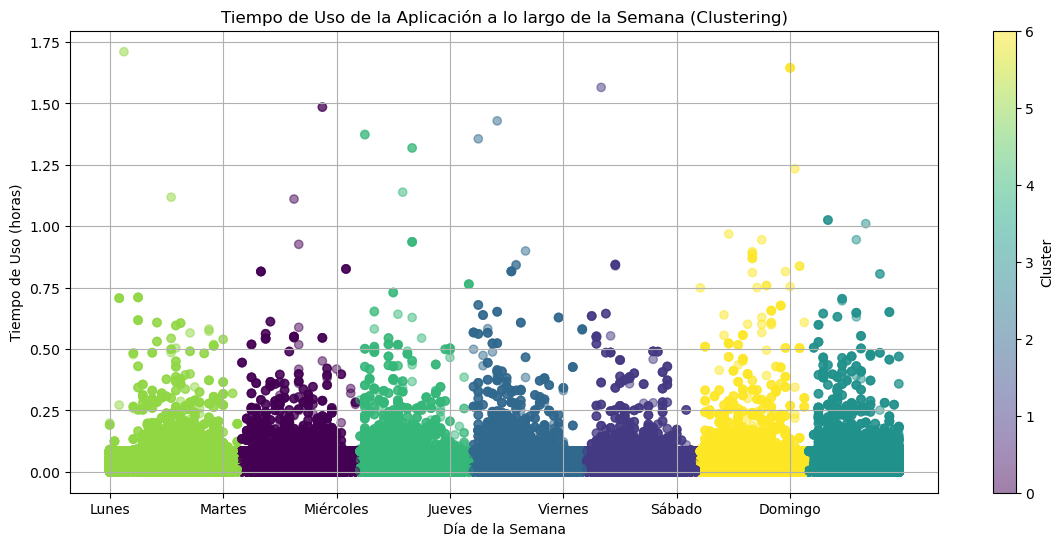

In [10]:
# Convierte las columnas de Application.Start y Application.End a tipo datetime
df_final['Application.Start'] = pd.to_datetime(df_final['Application.Start'], errors='coerce')
df_final['Application.End'] = pd.to_datetime(df_final['Application.End'], errors='coerce')

# Elimina las filas que contienen valores NaT
df_final = df_final.dropna(subset=['Application.Start', 'Application.End'])

# Calcula la duración de uso de la aplicación en horas
df_final['Tiempo de Uso (horas)'] = (df_final['Application.End'] - df_final['Application.Start']).dt.total_seconds() / 3600

# Filtra los registros donde el tiempo de uso es mayor que 0 horas y menor que 2 horas
df_final = df_final[(df_final['Tiempo de Uso (horas)'] > 0) & (df_final['Tiempo de Uso (horas)'] < 2)]

# Extrae el día de la semana de la columna Application.Start
df_final['Día de la Semana'] = df_final['Application.Start'].dt.dayofweek + df_final['Application.Start'].dt.hour / 24

# Aplica K-Means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df_final['Cluster'] = kmeans.fit_predict(df_final[['Día de la Semana', 'Tiempo de Uso (horas)']])

# Crea el gráfico de dispersión con los clusters
plt.figure(figsize=(14, 6))
plt.scatter(df_final['Día de la Semana'], df_final['Tiempo de Uso (horas)'], c=df_final['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Tiempo de Uso de la Aplicación a lo largo de la Semana (Clustering)')
plt.xlabel('Día de la Semana')
plt.ylabel('Tiempo de Uso (horas)')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

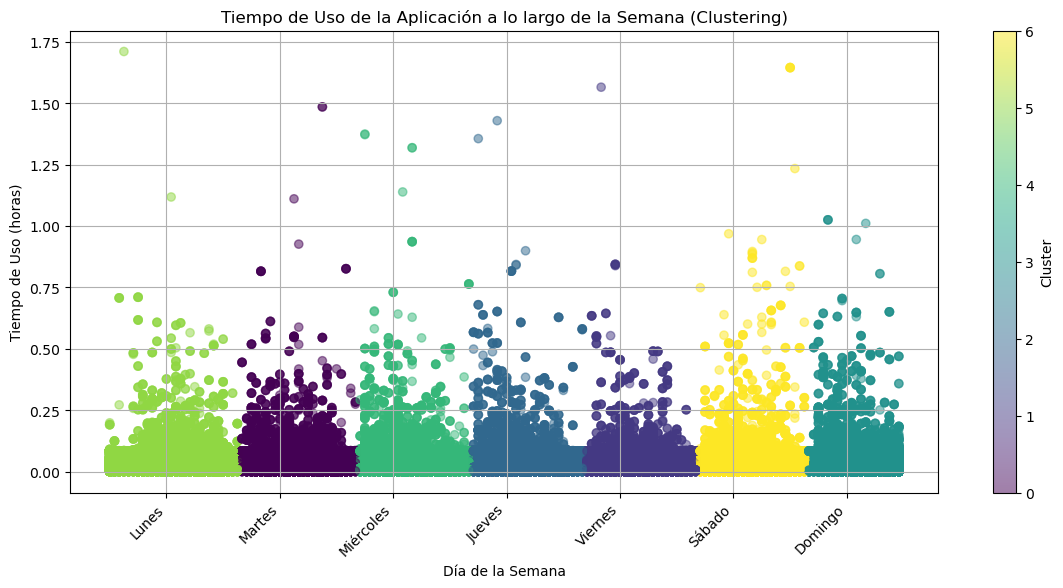

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.scatter(df_final['Día de la Semana'], df_final['Tiempo de Uso (horas)'], c=df_final['Cluster'], cmap='viridis', alpha=0.5)
plt.title('Tiempo de Uso de la Aplicación a lo largo de la Semana (Clustering)')
plt.xlabel('Día de la Semana')
plt.ylabel('Tiempo de Uso (horas)')
plt.xticks(ticks=np.arange(7) + 0.5, labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45, ha='right')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


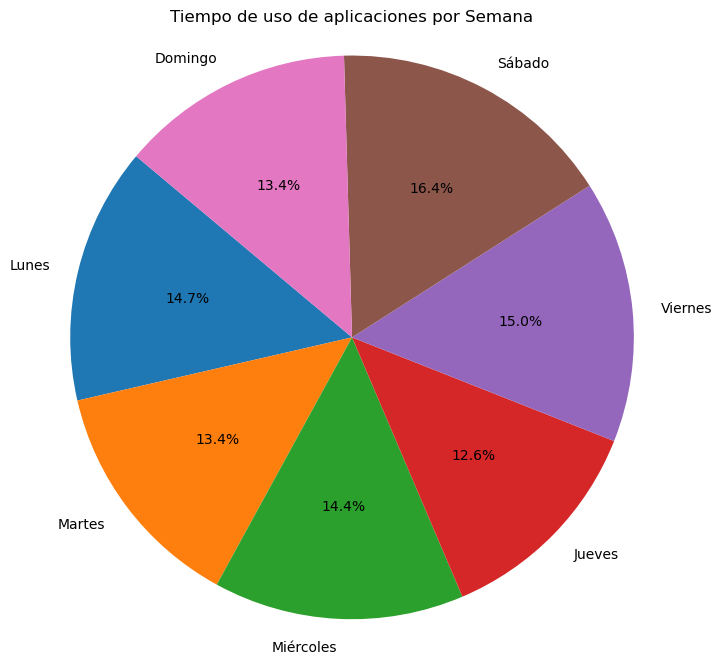

In [190]:
import numpy as np

# Calculate total usage time per cluster
cluster_usage = df_final.groupby('Cluster')['Tiempo de Uso (horas)'].sum()

# Define the day names
day_names = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

# Plotting the pie chart with day names as labels
plt.figure(figsize=(8, 8))
plt.pie(cluster_usage, labels=day_names, autopct='%1.1f%%', startangle=140)
plt.title('Tiempo de uso de aplicaciones por Semana')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [192]:
# Aplica K-Means clustering
kmeans1 = KMeans(n_clusters=3, random_state=42)
df_final['Cluster1'] = kmeans1.fit_predict(df_final[['aplicacion','Tiempo de Uso (horas)']])
# Aplica K-Means clustering
kmeans2 = KMeans(n_clusters=24, random_state=42)
df_final['Cluster2'] = kmeans2.fit_predict(df_final[['Hora','Tiempo de Uso (horas)']])


C:\Users\Janus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Janus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Este grafico ilustra mejor las variaciones del tiempo de uso de las aplicaciones durante los días de la semana, se observa una distinción notable representada por colores de cada dia y gracias a esto se puede determinar que el dia en promedio que mas se usan durante un tiempo mayor las aplicaciones corresponden al dia sábado, seguido por el día miércoles y el dia que menos tiempo se usan es el viernes, lo anterior es notable gráficamente mediante los puntos que están por encima del umbral de 0.75. Los domingos se usan menos cantidad de aplicaciones, mientras que los lunes y martes se usan mas cantidad de aplicaciones, la franja del ancho de estos días parece se mas gruesa que el resto.  

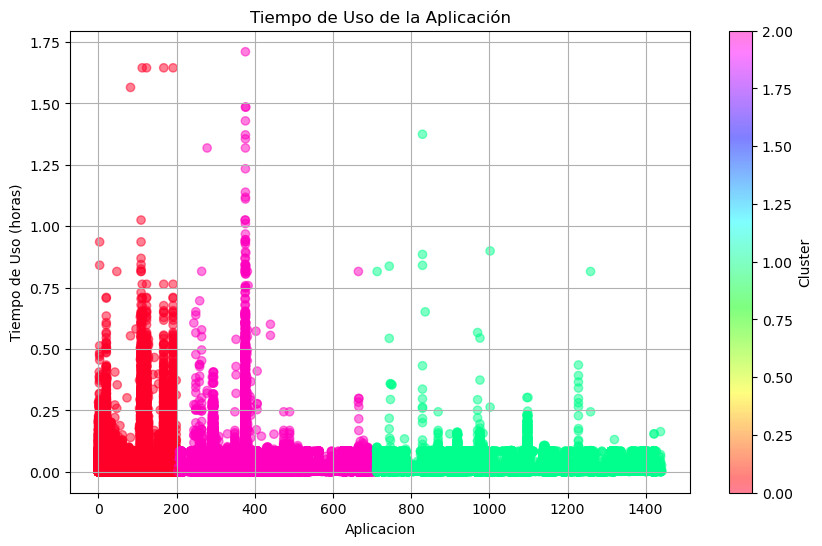

In [15]:
# Crea el gráfico de dispersión con los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final['aplicacion'], df_final['Tiempo de Uso (horas)'], c=df_final['Cluster1'], cmap='gist_rainbow', alpha=0.5)
plt.title('Tiempo de Uso de la Aplicación')
plt.xlabel('Aplicacion')
plt.ylabel('Tiempo de Uso (horas)')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

Al realizar un cluster de tres componentes que representa el tiempo de uso de cada aplicacion, En el grafico obtenido se puede visualizar como las doscientas primeras aplicaciones son las mas utilizadas y abarcan una mayor densidad que los otros dos grupos.

In [64]:
aplicaciones=[]

In [66]:
aplicaciones = df_final[df_final['Cluster1'] == 0]


In [145]:
aplicaciones2=[]
aplicaciones2=df_final[df_final['Cluster1'] == 1]

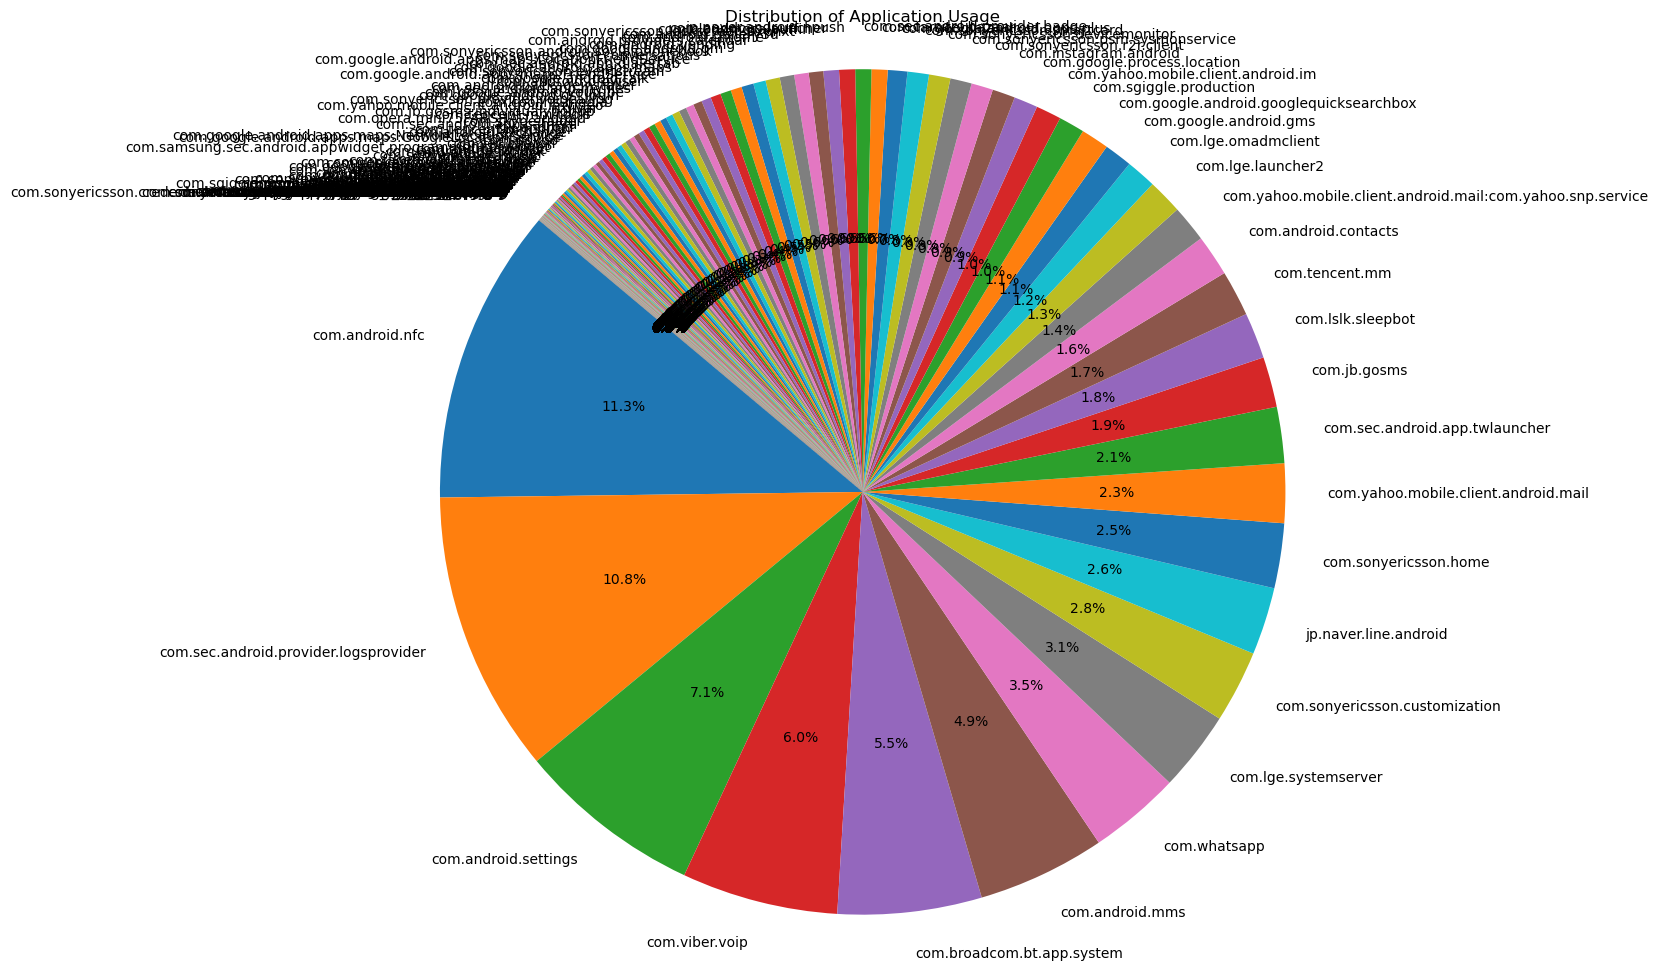

In [161]:
# Count the occurrences of each unique application
application_counts = aplicaciones['Application.ProcessName'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(12, 12))
plt.pie(application_counts, labels=application_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Application Usage')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [174]:
# Find the top three most used applications
top_three_apps = aplicaciones['Application.ProcessName'].value_counts().nlargest(3).index

# Exclude the top three applications from the DataFrame
filtered_aplicaciones = aplicaciones[~aplicaciones['Application.ProcessName'].isin(top_three_apps)]

# Count the occurrences of each unique application after excluding the top three
application_counts = filtered_aplicaciones['Application.ProcessName'].value_counts()


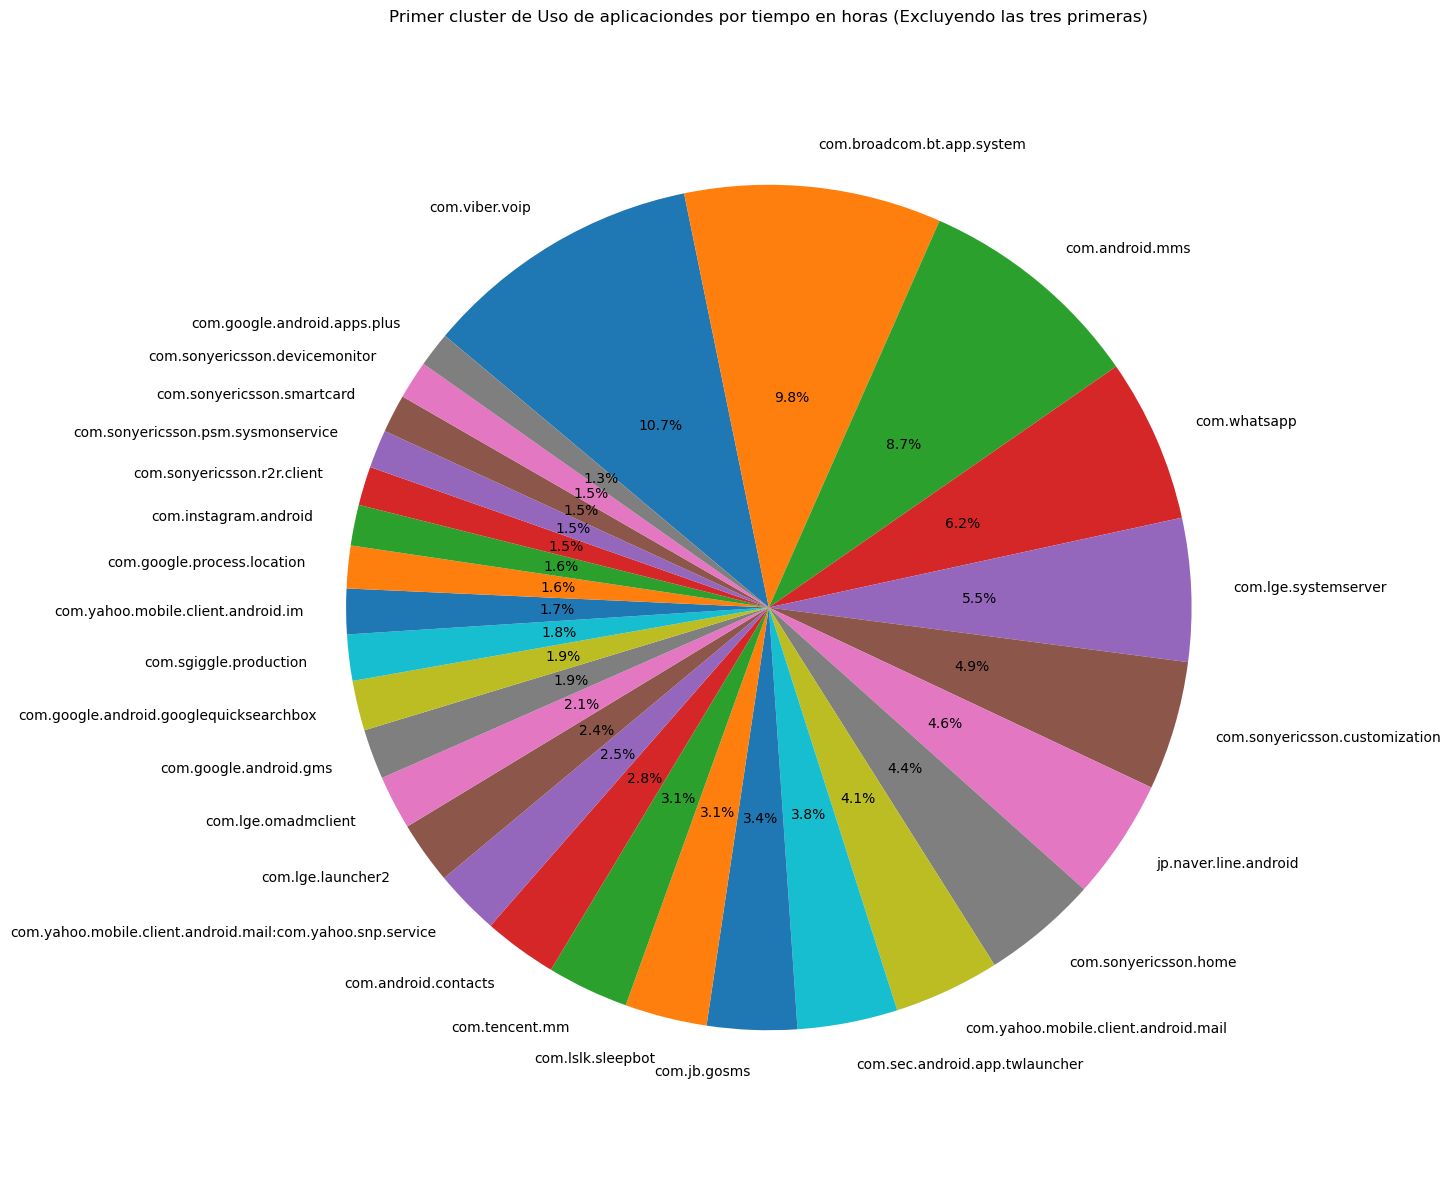

In [178]:
# Calculate the total number of applications
total_applications = application_counts.sum()

# Filter out the applications with less than 1% usage
filtered_application_counts = application_counts[application_counts / total_applications >= 0.01]

# Plotting the pie chart
plt.figure(figsize=(12, 15))
plt.pie(filtered_application_counts, labels=filtered_application_counts.index, autopct='%1.1f%%', startangle=140, counterclock=False, textprops={'rotation':0}, pctdistance=0.5)
plt.title('Primer cluster de Uso de aplicaciondes por tiempo en horas (Excluyendo las tres primeras)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle 
plt.show()


In [157]:
# Count the occurrences of each unique application
application_counts2 = aplicaciones2['Application.ProcessName'].value_counts()


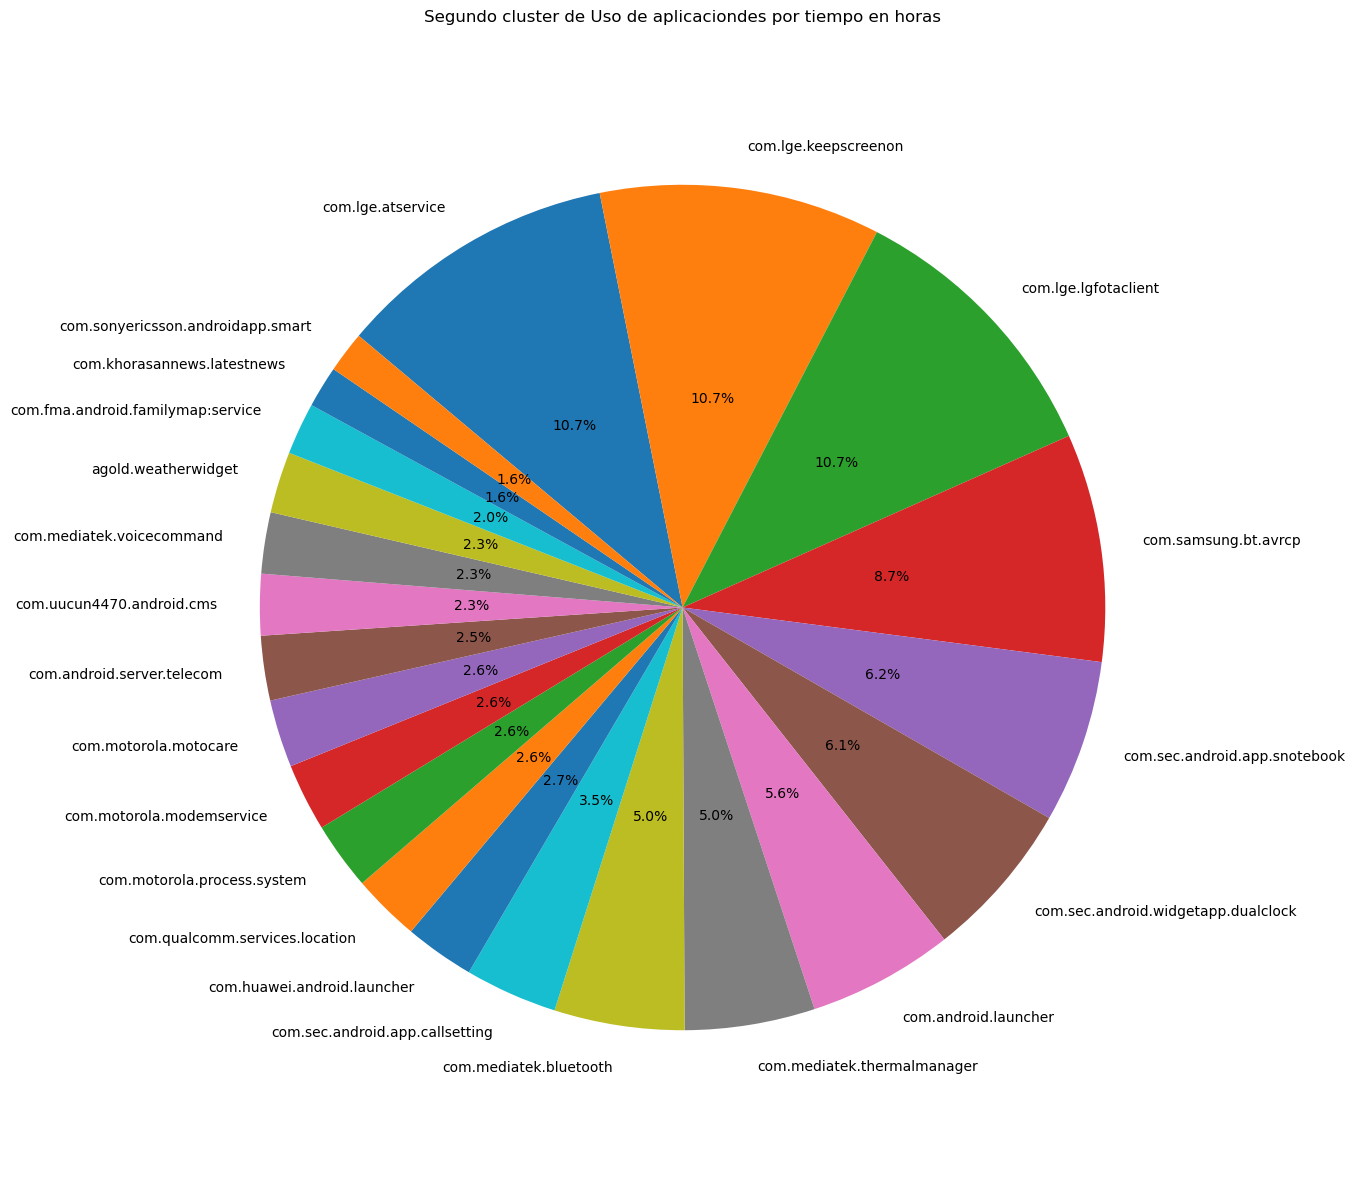

In [180]:
# Calculate the total number of applications
total_applications2 = application_counts2.sum()

# Filter out the applications with less than 1% usage
filtered_application_counts2 = application_counts2[application_counts2 / total_applications2 >= 0.01]

# Plotting the pie chart
plt.figure(figsize=(12, 15))
plt.pie(filtered_application_counts2, labels=filtered_application_counts2.index, autopct='%1.1f%%', startangle=140, counterclock=False, textprops={'rotation':0}, pctdistance=0.5)
plt.title('Segundo cluster de Uso de aplicaciondes por tiempo en horas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle 
plt.show()


In [163]:
aplicaciones3=[]
aplicaciones3=df_final[df_final['Cluster1'] == 2]
application_counts3 = aplicaciones3['Application.ProcessName'].value_counts()

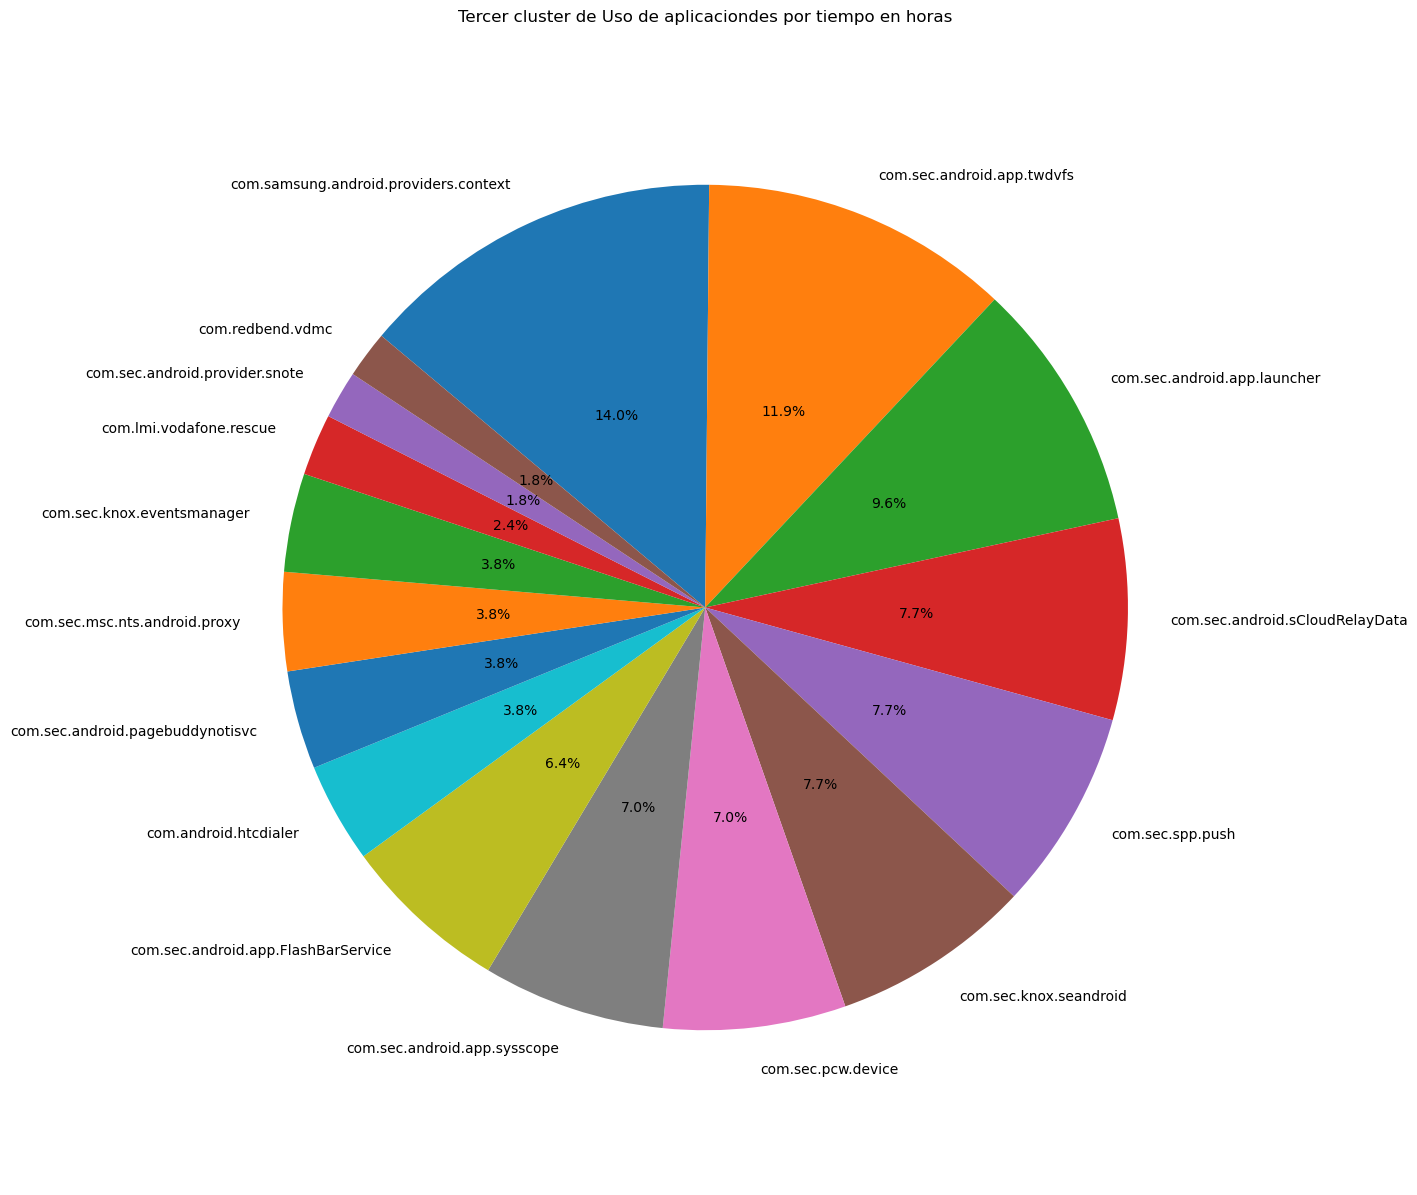

In [182]:
# Calculate the total number of applications
total_applications3 = application_counts3.sum()

# Filter out the applications with less than 1% usage
filtered_application_counts3= application_counts3[application_counts3 / total_applications3 >= 0.01]

# Plotting the pie chart
plt.figure(figsize=(12, 15))
plt.pie(filtered_application_counts3, labels=filtered_application_counts3.index, autopct='%1.1f%%', startangle=140, counterclock=False, textprops={'rotation':0}, pctdistance=0.5)
plt.title('Tercer cluster de Uso de aplicaciondes por tiempo en horas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle 
plt.show()

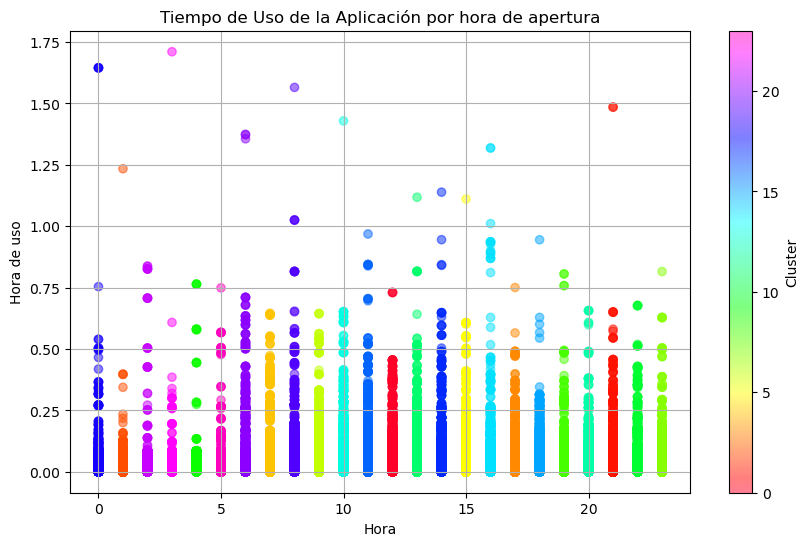

In [198]:
# Crea el gráfico de dispersión con los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final['Hora'],df_final['Tiempo de Uso (horas)'], c=df_final['Cluster2'], cmap='gist_rainbow', alpha=0.5)
plt.title('Tiempo de Uso de la Aplicación por hora de apertura')
plt.xlabel('Hora')
plt.ylabel('Hora de uso')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

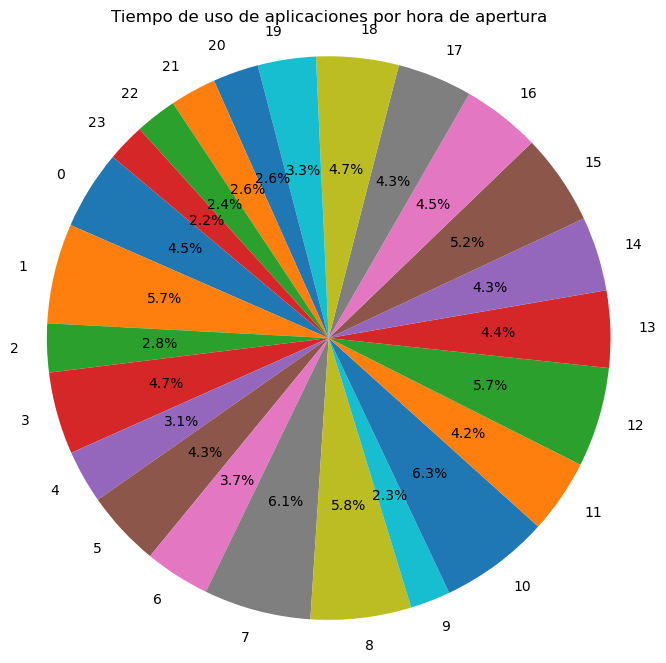

In [200]:
# Calculate total usage time per cluster
cluster_usage2 = df_final.groupby('Cluster2')['Tiempo de Uso (horas)'].sum()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_usage2, labels=cluster_usage2.index, autopct='%1.1f%%', startangle=140)
plt.title('Tiempo de uso de aplicaciones por hora de apertura')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

Al hacer un analisis de todos los clusters y sus graficas nos dan informaacion relevante, de el tiempo de uso de aplicaciones y en general del movil. Los dias sabados se usa mas el movil, mientras que los jueves es el dia que menos se usa, esto puede servir para poner mas publicidad en las aplicaciones los dias sabado, viernes, lunes y miercoles en comparacion a los otros dias. 
Tambien nos da informacion relacionada a los problemas de sueño, las estadisticas muestran que abrir una aplicacion entre las 12 y la 1 am hace que nos quedemos mas tiempo pegados en el telefono. Tambien esa misma informacion podria servir para mandar notificaciones de alguna aplicacion entre las siguientes horas diurnas: 7:00am,8:00am, 10:00 am, 12:00 pm, 3:00 pm, 6:00pm. Denro de es ashoras es mas probable que si alguien abre una aplicacion se quede mas tiempo enganchado al movil.

Por ultimo de los tres cluster de tiempo de uso por aplicacion , este las dividio en 3 categorias, alto, medio y bajo. La aplicaciones dentro de la categoria de alto uso, las mas utilizadas fueron viber, mensajes y whatsapp. 


En el dataset se identifican 34 campos, de los cuales se pueden reducir a enois aperando las fechas con datetime y combinando las ubicaiones, sin embargo aun queda bastantes campos que al trabajar con todos puede haber mucho ruido, asi que se opto por las variables que mas daban sentido como nombre del proceso de la aplicación, duración, hora del dia en que se abre y dia de la semana. 

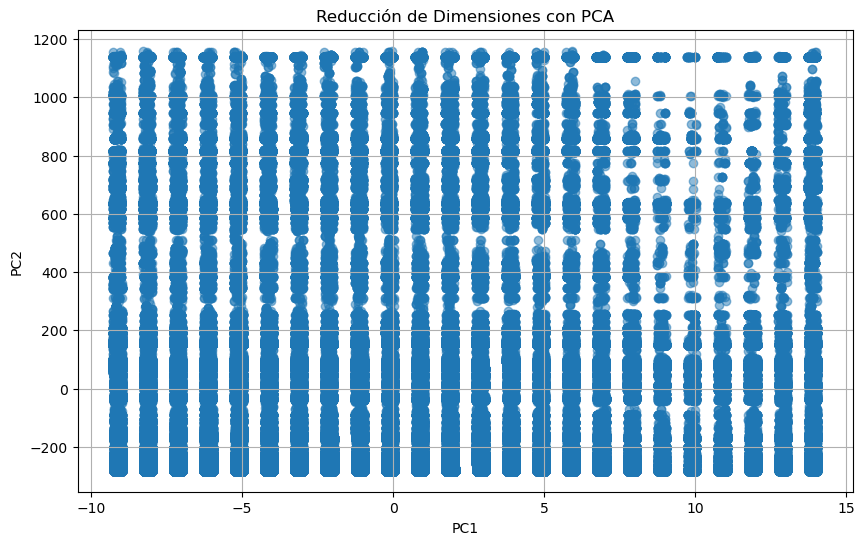

In [220]:
# Aplicar PCA para reducción de dimensiones
pca = PCA(n_components=2)  # Especifica el número de componentes principales deseados
df_selected = df_final[['Tiempo de Uso (horas)','Hora','Día de la Semana', 'aplicacion']]
df_pca = pca.fit_transform(df_selected)

# Convertir el resultado de PCA a DataFrame
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

# Concatenar los resultados de PCA con el DataFrame original filtrado
df_final_pca = pd.concat([df_final.reset_index(drop=True), df_pca], axis=1)

# Crea el gráfico de dispersión con los clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_final_pca['PC2'], df_final_pca['PC1'], alpha=0.5)
plt.title('Reducción de Dimensiones con PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Establecer los límites del eje y para PC2

plt.show()

C:\Users\Janus\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


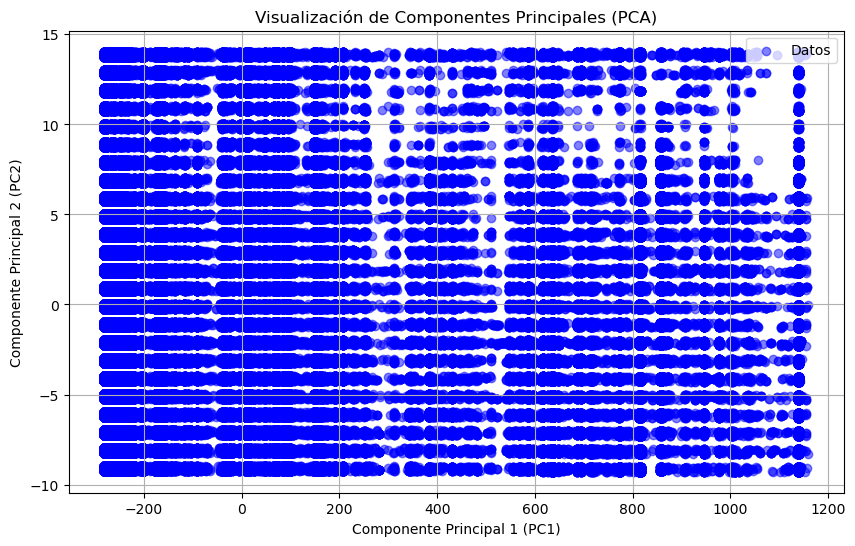

In [222]:
# Crea el gráfico de dispersión con las componentes principales (PC1 y PC2)
plt.figure(figsize=(10, 6))
plt.scatter(df_final_pca['PC1'], df_final_pca['PC2'], alpha=0.5, c='blue', label='Datos')
plt.title('Visualización de Componentes Principales (PCA)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.grid(True)

# Muestra el gráfico
plt.legend()
plt.show()


C:\Users\Janus\AppData\Local\Temp\ipykernel_15296\4153411105.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_final_pca['PC1'], y=df_final_pca['PC2'], cmap='viridis', shade=True, bw_adjust=0.5)
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


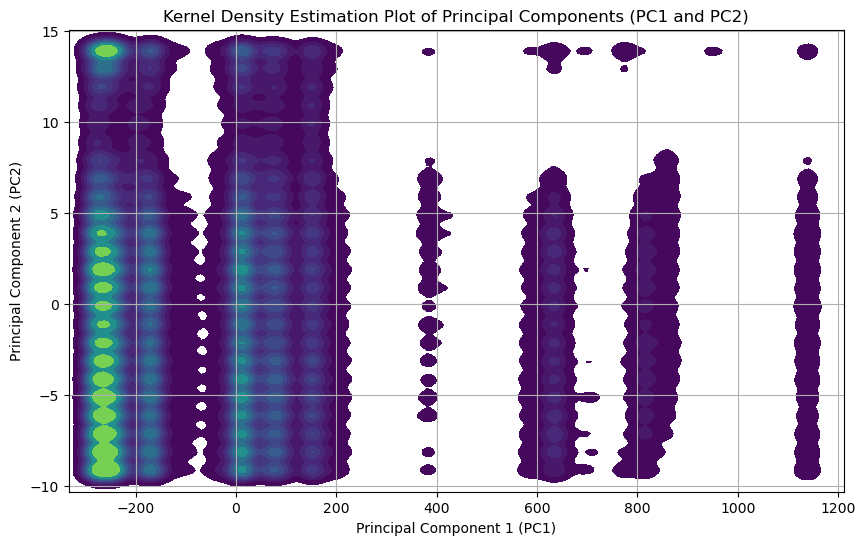

In [234]:
import seaborn as sns

# Create a kernel density estimation plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df_final_pca['PC1'], y=df_final_pca['PC2'], cmap='viridis', shade=True, bw_adjust=0.5)
plt.title('Kernel Density Estimation Plot of Principal Components (PC1 and PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)

# Show the plot
plt.show()


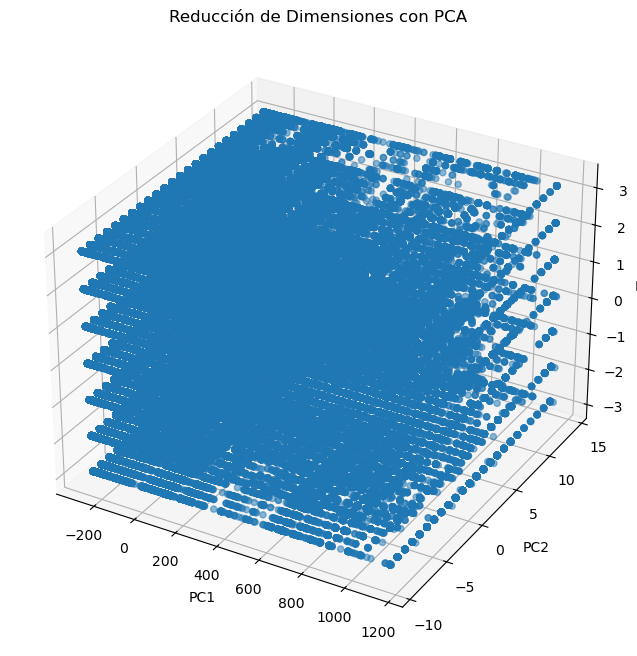

In [208]:
from mpl_toolkits.mplot3d import Axes3D

# Crear gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_final_pca['PC1'], df_final_pca['PC2'], df_final_pca['PC3'], alpha=0.5)
ax.set_title('Reducción de Dimensiones con PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.grid(True)

# Mostrar el gráfico en 3D
plt.show()

In [20]:
import seaborn as sns

In [206]:
sns.pairplot(df_final_pca)

C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Janus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

KeyError: 'Día de la Semana'

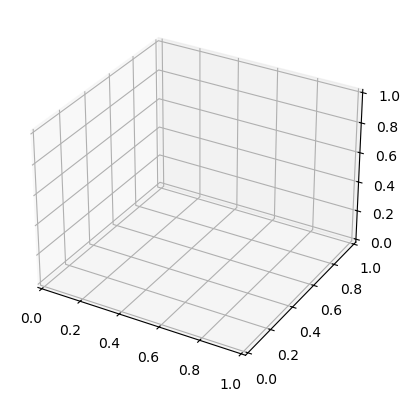

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
ax.scatter(df_selected['Día de la Semana'], df_selected['Tiempo de Uso (horas)'], df_selected['aplicacion'], c='r', marker='o',cmap='Spectral')

# Setting labels for each axis
ax.set_xlabel('Día de la Semana')
ax.set_ylabel('Tiempo de Uso (horas)')
ax.set_zlabel('aplicacion')
ax.view_init(elev=45, azim=0)


plt.show()

In [ ]:
#recargar datos
df_final = copia

In [ ]:
df_final_pca['PC1'].head()
df_final_pca['PC2'].head()

In [ ]:
df_final['aplicacion']